# SLEEP HEALTH AND LIFESTYLE

### This machine learning project aims at predicting sleep disorders by using several lifestyle factors and health indicators.
### This project helps to predict whether a person is suffering from sleep disorders such as insomnea and sleep apnea.
### The accuracy of the model is further enhanced by using different machine learning algorithms.
### The dataset consists of 374 rows and 13 columns, encompassing various demographic, health, and lifestyle variables.

### The dataset comprises following elements:
#### Person ID: An identifier for each individual.
#### Gender: The gender of the person (Male/Female).
#### Age: The age of the person in years.
#### Occupation: The occupation or profession of the person.
#### Sleep Duration (hours): The number of hours the person sleeps per day.
#### Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
#### Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
#### Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
#### BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
#### Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
#### Heart Rate (bpm): The resting heart rate of the person in beats per minute.
#### Daily Steps: The number of steps the person takes per day.

### The column titled "Sleep disorders", comprises three categories:

#### No sleep disorder: The individual does not exhibit any specific sleep disorder.
#### Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
#### Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

In [52]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [53]:
#load the dataset titled "Sleep_health_and_lifestyle_dataset"
data=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [54]:
#to display the information about the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [55]:
#to find the no of rows and columns
data.shape

(374, 13)

In [56]:
#to find the datatypes of each element within the data frame
data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [57]:
#to find the different classes in the column 'Sleep Disorder'
data['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [58]:
#to drop irrelevant columns
data1=data.drop(['Person ID','Gender','Occupation','Age'],axis=1)
data1

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...
369,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [59]:
#to identify the missing values in the data frame
data1.isna().sum()

Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [60]:
#People with null values under Sleep Disorder might mean they do not have any sleep disorder. So, we will replace the Null values with None. 
data1["Sleep Disorder"].fillna("No sleep disorder", inplace= True)

In [61]:
data1['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [62]:
#to convert categorical data to numerical form
le=LabelEncoder()
data1['BMI Category']=le.fit_transform(data1['BMI Category'])
data1['Blood Pressure']=le.fit_transform(data1['Blood Pressure'])
data1['Sleep Disorder']=le.fit_transform(data1['Sleep Disorder'])
data1

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,6.1,6,42,6,3,11,77,4200,1
1,6.2,6,60,8,0,9,75,10000,1
2,6.2,6,60,8,0,9,75,10000,1
3,5.9,4,30,8,2,22,85,3000,2
4,5.9,4,30,8,2,22,85,3000,2
...,...,...,...,...,...,...,...,...,...
369,8.1,9,75,3,3,23,68,7000,2
370,8.0,9,75,3,3,23,68,7000,2
371,8.1,9,75,3,3,23,68,7000,2
372,8.1,9,75,3,3,23,68,7000,2


In [63]:
data1.isna().sum()

Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [64]:
data1['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

In [65]:
data1['Sleep Disorder'].unique()

array([1, 2, 0])

In [66]:
#to split data into features and target
x=data1.drop('Sleep Disorder',axis=1)
y=data1['Sleep Disorder']
#x implies features
#y implies target

In [67]:
#to split the dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=20)

In [68]:
#to normalize the variables
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,GridSearchCV

In [70]:
log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=5)  
dc_score=cross_val_score(DecisionTreeClassifier(),x,y)
rf_score=cross_val_score(RandomForestClassifier(random_state=100),x,y) 
kn_score=cross_val_score(KNeighborsClassifier(n_neighbors=5),x,y)
svm_score=cross_val_score(SVC(),X=x,y=y)

In [73]:
print(log_score)
print(dc_score)
print(rf_score)
print(kn_score)
print(svm_score)

[0.73333333 0.96       1.         0.6        0.83783784]
[0.69333333 0.73333333 0.94666667 0.58666667 0.83783784]
[0.69333333 0.92       0.96       0.58666667 0.83783784]
[0.70666667 0.8        0.98666667 0.52       0.7972973 ]
[0.58666667 0.58666667 0.58666667 0.6        0.55405405]


In [74]:
print(np.mean(log_score))
print(np.mean(dc_score))
print(np.mean(rf_score))
print(np.mean(kn_score))
print(np.mean(svm_score))

0.8262342342342344
0.7595675675675675
0.7995675675675675
0.7621261261261262
0.5828108108108108


##### By finding the score using various machine learning algorithms, we understand that the Logistic Regression, gives the best accuracy, i.e, 93.33%.

In [75]:
# find best parameters using gridsearchcv
log=LogisticRegression()

# Define a parameter grid to search

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [11, 12, 20]
}


# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=log, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 11, 'penalty': 'none'}


In [76]:
model=LogisticRegression(C=11,penalty='none')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9333333333333333

In [77]:
#to make predictions
y_pred=model.predict(x_test)

In [78]:
prediction_table=pd.DataFrame({'True y value':y_test,'Predicted y value':y_pred})
prediction_table

,True y value,Predicted y value
181,1,1
90,1,1
287,2,2
117,1,1
110,1,1
...,...,...
364,2,2
238,0,0
350,2,2
195,0,0


In [79]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [80]:
confusion_matrix(y_test,y_pred)

array([[14,  2,  0],
       [ 0, 47,  1],
       [ 0,  2,  9]], dtype=int64)

In [81]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.92      0.98      0.95        48
           2       0.90      0.82      0.86        11

    accuracy                           0.93        75
   macro avg       0.94      0.89      0.91        75
weighted avg       0.94      0.93      0.93        75



Text(50.722222222222214, 0.5, 'predictions')

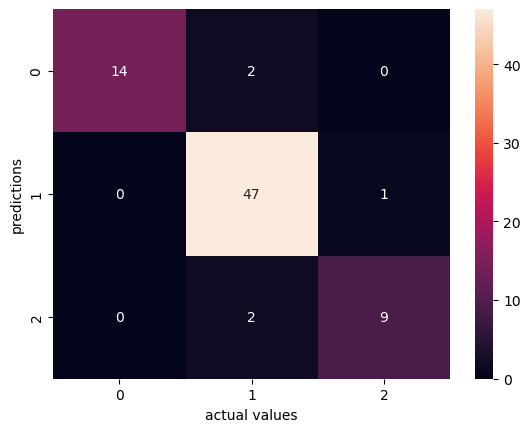

In [82]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('predictions')

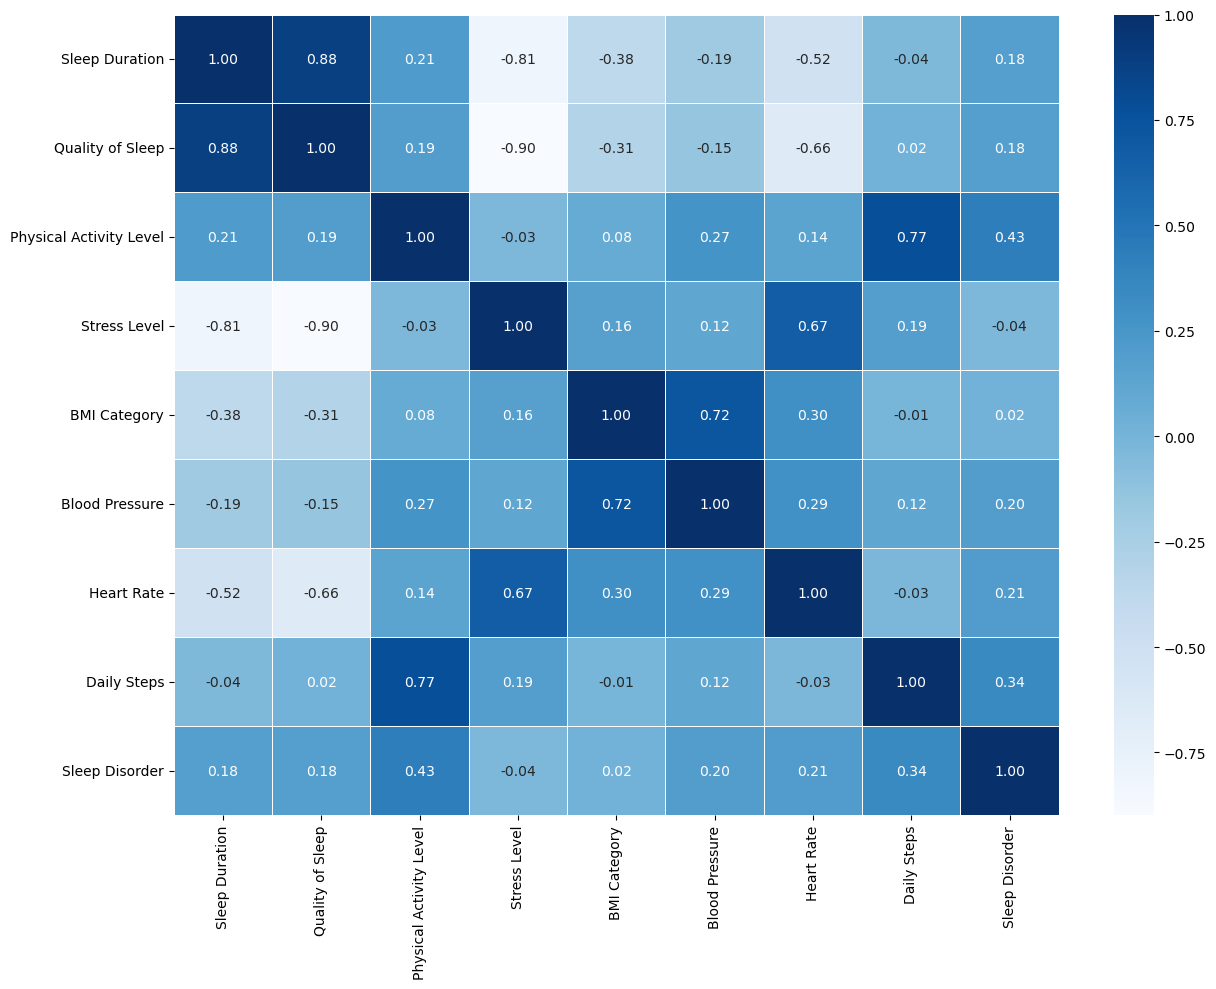

In [83]:
# Make correlation matrix 
corr_matrix = data1.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(13,10))

ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")
plt.tight_layout();


### DATA VISUALISATION

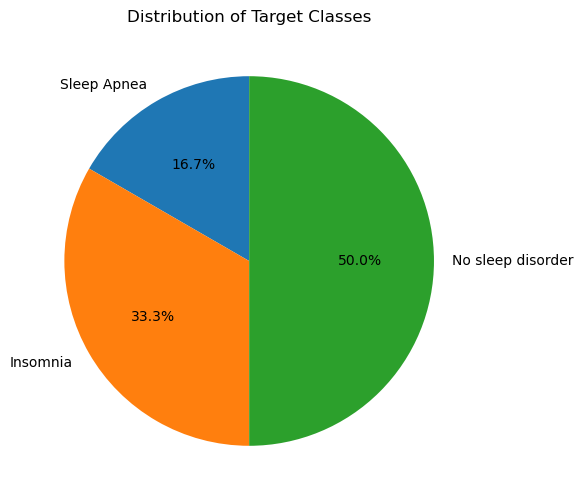

In [84]:
# Assuming target_counts is a list of counts for each class
target_counts = [10, 20, 30]  # Example counts

# Ensure that the length of the labels matches the length of the data
labels = ["Sleep Apnea", "Insomnia", "No sleep disorder"]

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Target Classes")
plt.show()

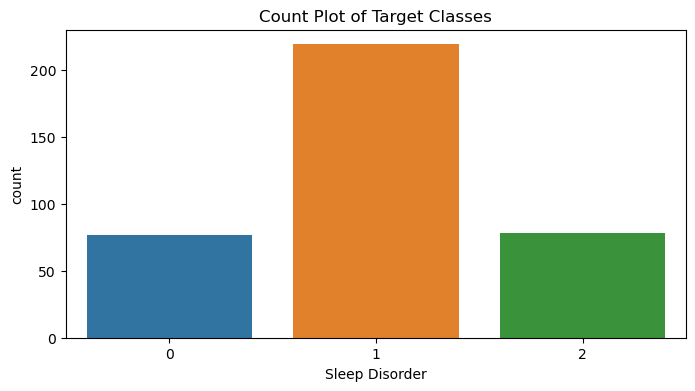

In [85]:
plt.figure(figsize=(8, 4))  # Set the figure size (width, height)
sns.countplot(data=data1, x='Sleep Disorder')
plt.title("Count Plot of Target Classes")
plt.show()

In [91]:
model.predict([[8.1,9,75,3,3,23,68,7000]])

array([2])

In [87]:
# savig the model
import joblib
joblib.dump(model,'joblib_model')
new_model=joblib.load('joblib_model')